In [1]:
# import module
from pdf2image import convert_from_path


# Store Pdf with convert_from_path function
images = convert_from_path('20240716172417-0001.pdf')

for i in range(len(images)):
  
      # Save pages as images in the pdf
    images[i].save('page_'+ str(i) +'.jpg', 'JPEG')

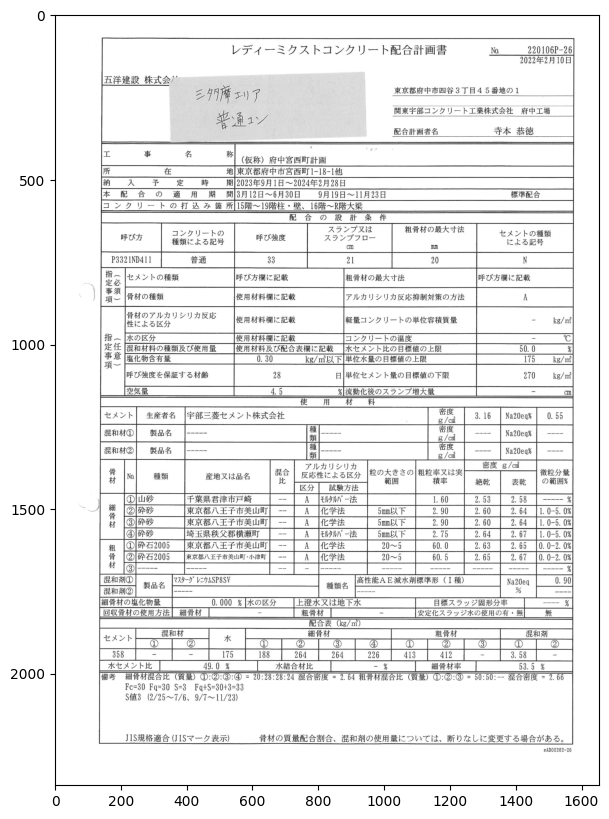

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('page_0.jpg')

plt.figure(figsize=[25,10])

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')

(-0.5, 1654.5, 2339.5, -0.5)

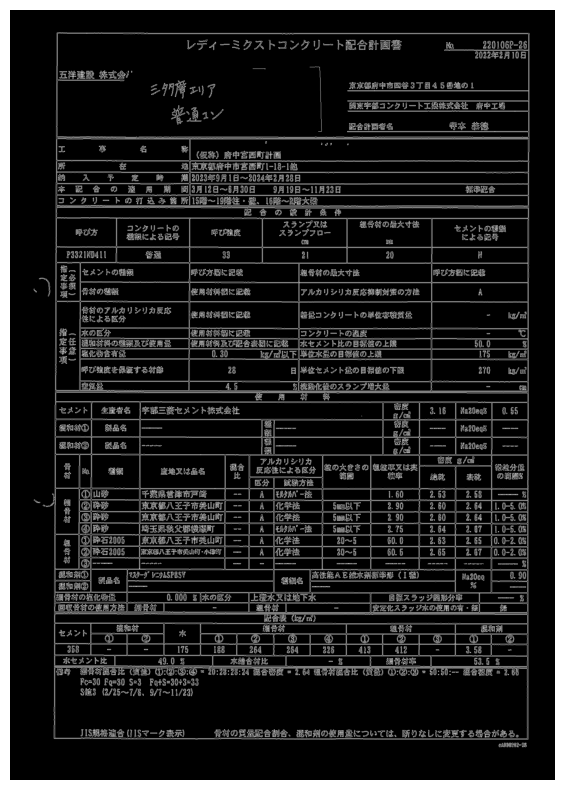

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_img, 100, 200)
plt.figure(figsize=[25,10])

plt.imshow(edges,cmap = 'gray')
plt.axis('off')

In [4]:
contours, hierarchy = cv2.findContours(image=gray_img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)


In [5]:
image_area = img.shape[0] * img.shape[1]
print(image_area)

3872700


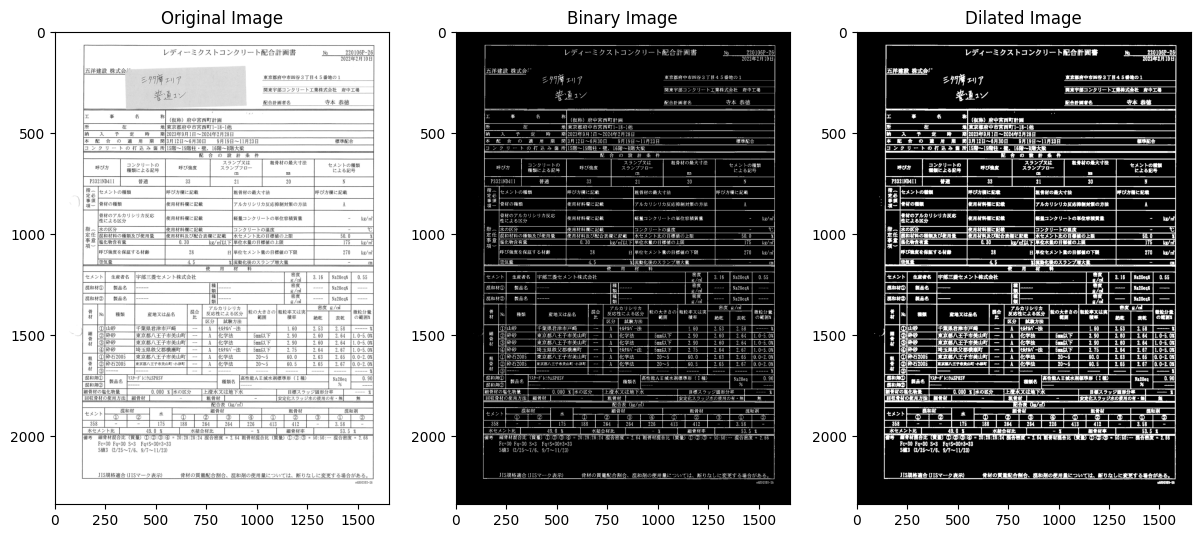

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển đổi sang ảnh nhị phân
image = cv2.imread('page_0.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tạo phần tử cấu trúc (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

dilated = cv2.dilate(binary_image, kernel)


# Hiển thị kết quả
plt.figure(figsize=(25, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

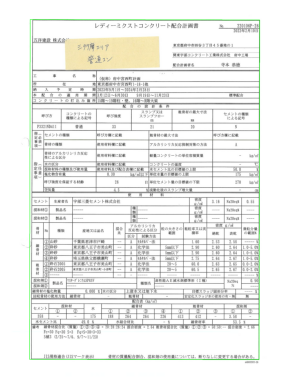

In [7]:
# Tìm contours
contours, _ = cv2.findContours(image= dilated,mode= cv2.RETR_EXTERNAL,method= cv2.CHAIN_APPROX_SIMPLE)

image = cv2.imread('page_0.jpg')
image_copy = image.copy()

cnt = max(contours, key=cv2.contourArea)


rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int32(box)
cv2.drawContours(image_copy,[box],0,(0,255,0),2)
    

# Hiển thị ảnh với các đường viền xấp xỉ
plt.imshow(image_copy)
plt.axis('off')
plt.show

In [9]:
print(image.shape)

(2340, 1655, 3)


In [8]:
print(box)

[[ 123 2215]
 [ 127   66]
 [1577   69]
 [1573 2217]]


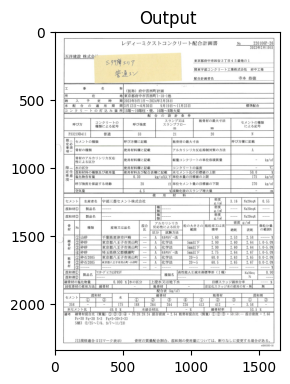

In [10]:
from PIL import Image


image_copy = image.copy()

pts1 = np.float32(box)
pts2 = np.float32([[50,image.shape[0]-50],[50,50],[image.shape[1]-50,50],[image.shape[1]-50,image.shape[0]-50]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(image_copy,M,(image.shape[1],image.shape[0]))

plt.subplot(122),plt.imshow(dst, cmap='gray'),plt.title('Output')
plt.show()

image_to_save = Image.fromarray(dst)
image_to_save.save('70' +'.jpg', 'JPEG')

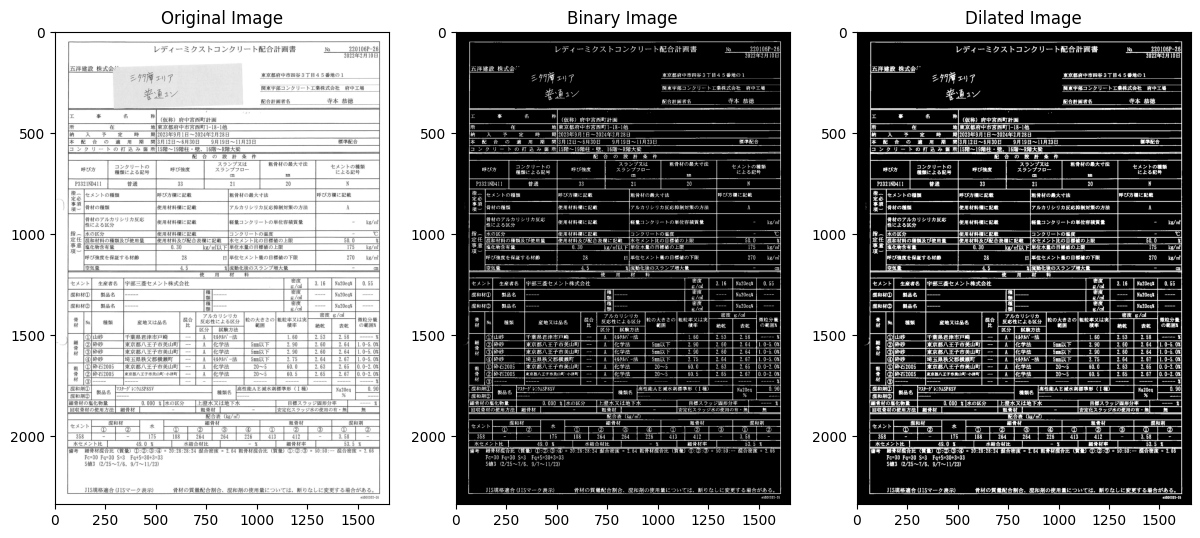

In [12]:
image = cv2.imread('70.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tạo phần tử cấu trúc (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

dilated = cv2.dilate(binary_image, kernel)

# Hiển thị kết quả
plt.figure(figsize=(25, 10))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')


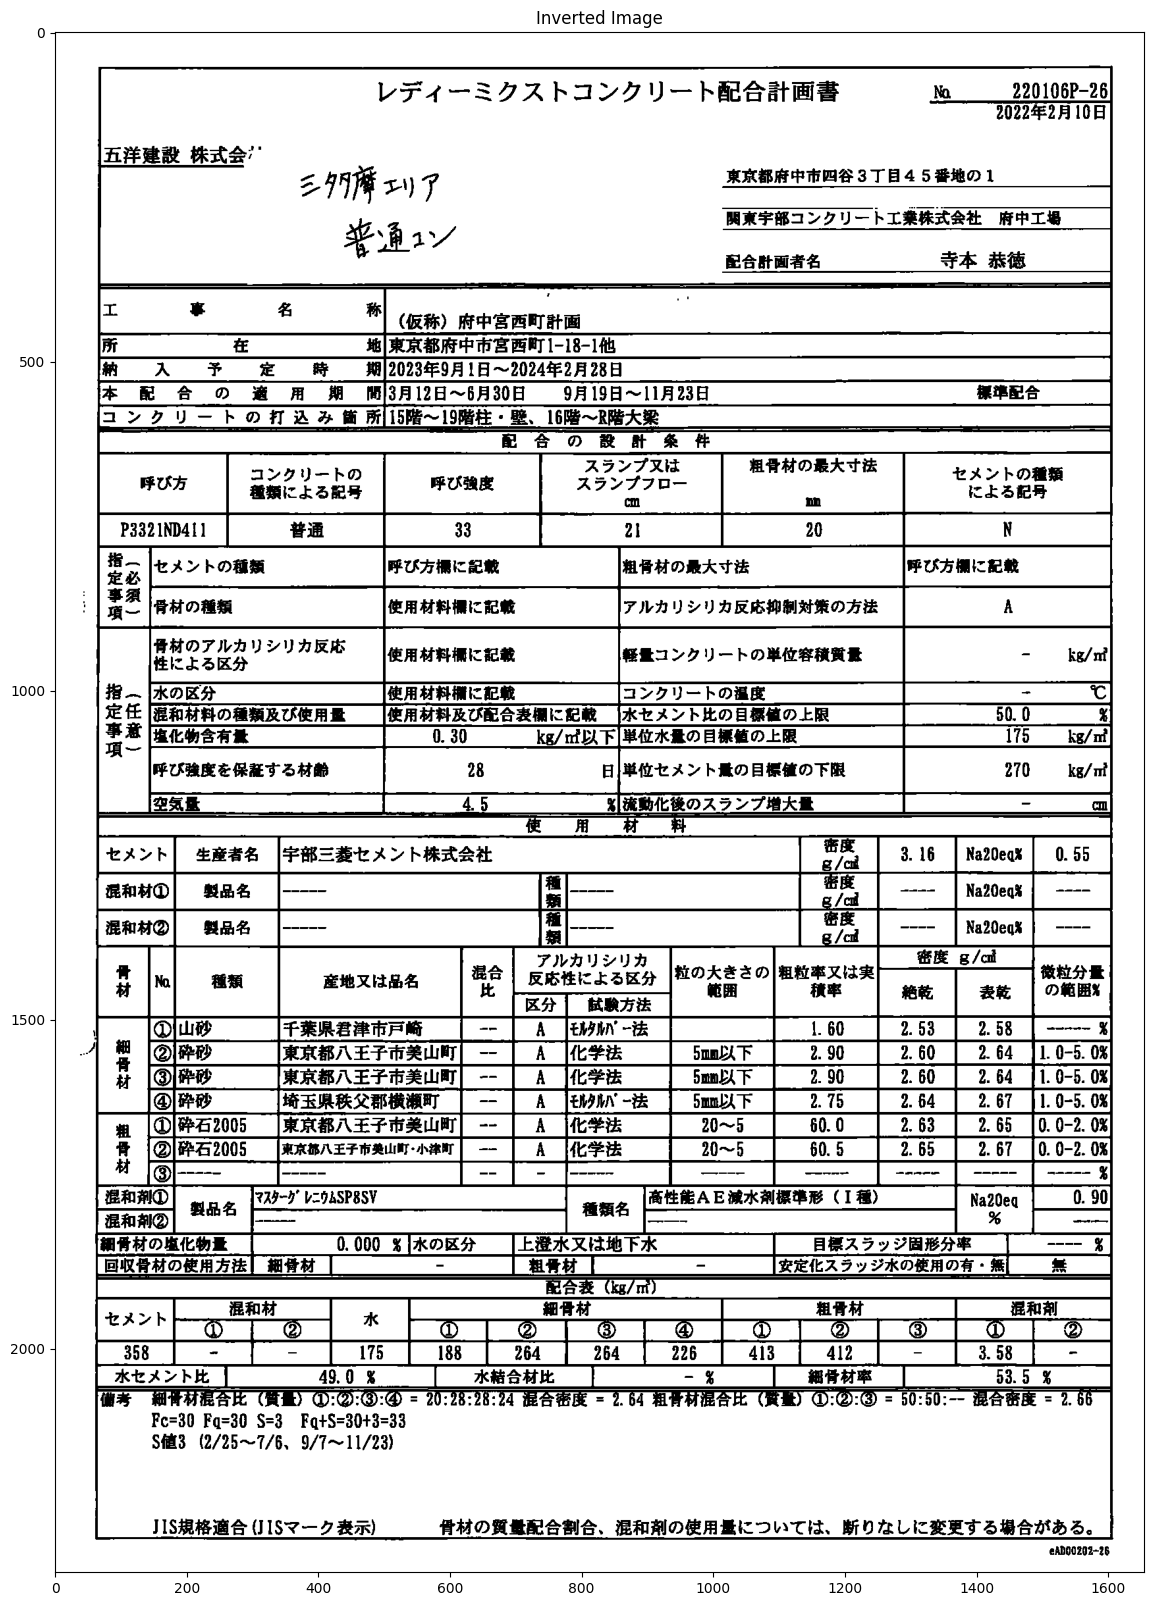

In [13]:
inverted_image = cv2.bitwise_not(dilated)

# Hiển thị ảnh trước và sau khi đảo màu

plt.figure(figsize=(25, 20))
plt.title('Inverted Image')
plt.imshow(inverted_image, cmap='gray')

<function matplotlib.pyplot.show(close=None, block=None)>

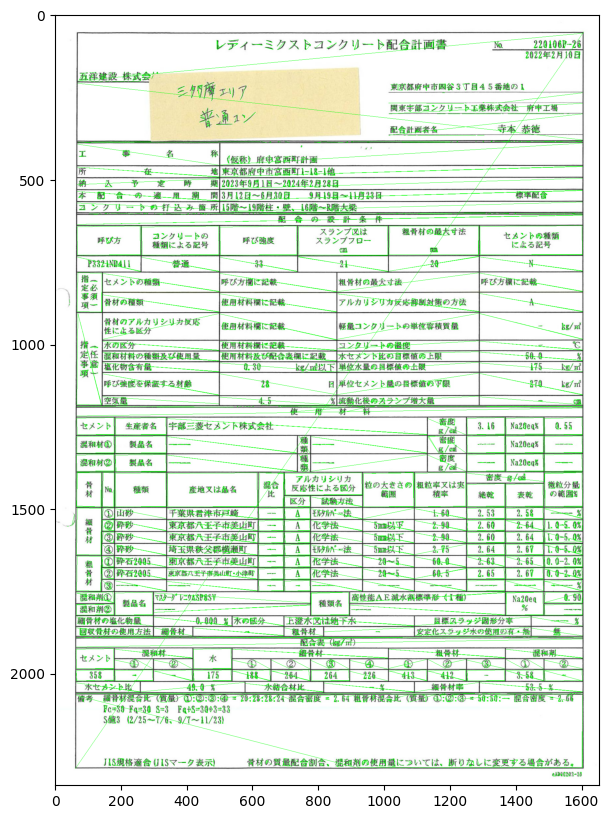

In [14]:
image = cv2.imread('70.jpg')

edges = cv2.Canny(inverted_image, 100, 200)


contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    # Tính chu vi của đường viền
    epsilon = 0.1 * cv2.arcLength(cnt, True)
    
    # Xấp xỉ đường viền thành đa giác
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    # Vẽ đa giác xấp xỉ lên ảnh
    cv2.drawContours(image_copy, [approx], -1, (0, 255, 0), 1)

# Hiển thị ảnh với các đường viền xấp xỉ
plt.figure(figsize=(25, 10))

plt.imshow(image_copy[:,:,::-1])
plt.show

In [15]:
image = cv2.imread('70.jpg')

S = image.shape[0] * image.shape[1]


In [16]:
print(image.shape[0],image.shape[1])

2340 1655


<function matplotlib.pyplot.show(close=None, block=None)>

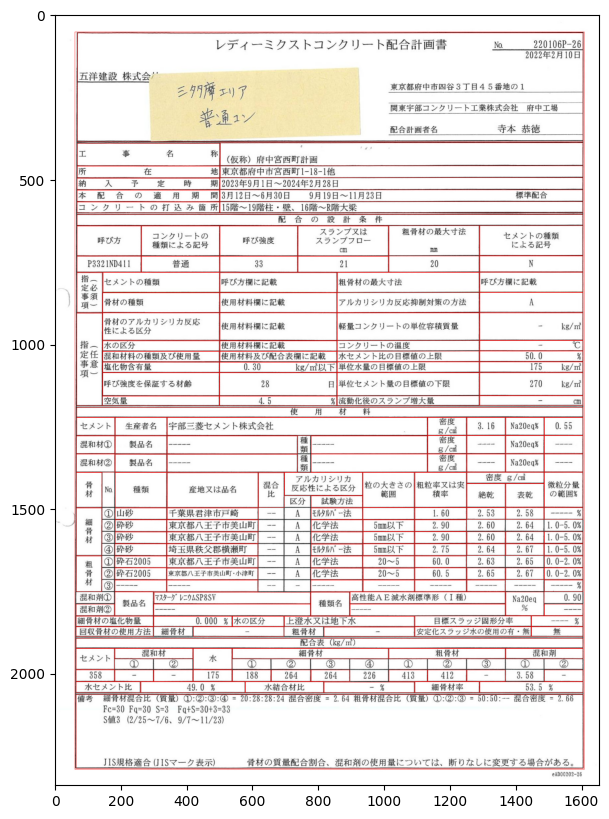

In [17]:
# image = cv2.imread('50.jpg')
# blur = cv2.blur(image,(3,3))


# edges = cv2.Canny(inverted_image, 100, 200)
edges = cv2.Canny(inverted_image, 100, 200)


contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()
# Duyệt qua từng đường viền tìm được
for cnt in contours:
    # Tính chu vi của đường viền
    if cv2.contourArea(cnt) > S * 0.001:
    # if w > image.shape[1] * 0.5:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(image_copy,(x,y),(x+w,y+h),(0,0,255),1)
    

# Hiển thị ảnh với các đường viền xấp xỉ
plt.figure(figsize=(25, 10))

plt.imshow(image_copy[:,:,::-1])
plt.show

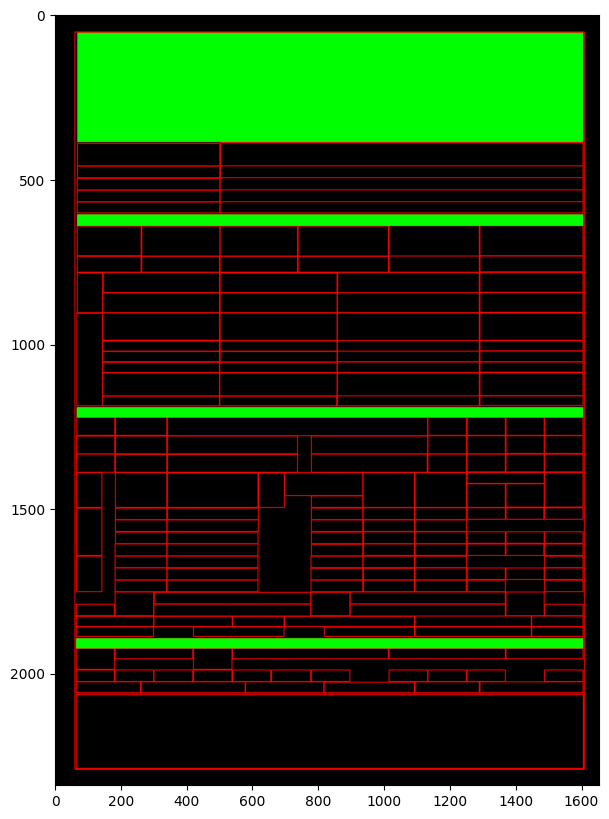

In [18]:
# Tạo ảnh mới để vẽ và tô kín các contour (có thể là ảnh đen cùng kích thước với ảnh gốc)
image_contours_filled = np.zeros_like(image)  # Ảnh đen cùng kích thước với ảnh gốc

rectangles = []

# Duyệt qua từng contour tìm được
for cnt in contours:
    # Kiểm tra diện tích contour để loại bỏ những contour quá nhỏ
    if cv2.contourArea(cnt) > S * 0.001:
        # Tô kín phần bên trong của contour (màu xanh lá cây, tô kín với -1)
        # cv2.drawContours(image_contours_filled, [cnt], -1, (0, 255, 0), 2)
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(image_contours_filled,(x,y),(x+w,y+h),(0,0,255),2)

        if w > 0.8 * image.shape[1] and h < 40:
            cv2.rectangle(image_contours_filled,(x,y),(x+w,y+h),(0,255,0),-1)
            rectangles.append((x, y, x + w, y + h))

        if cv2.contourArea(cnt) > S * 0.1 and cv2.contourArea(cnt) < S * 0.8:
            cv2.rectangle(image_contours_filled,(x,y),(x+w,y+h),(0,255,0),-1)
            rectangles.append((x, y, x + w, y + h))
        
r = sorted(rectangles, key=lambda rect: rect[1], reverse= False)

# Hiển thị ảnh với các contour đã được tô kín
plt.figure(figsize=(25, 10))
plt.imshow(image_contours_filled[:,:,::-1])  # Đảo kênh BGR sang RGB để hiển thị đúng màu
plt.show()

In [19]:
# x y x2 y2
for i in r:
    print(i)

cut = []

cut.append(r[0])

cut.append((r[0][0], r[0][3], r[1][2], r[1][1]))

cut.append((r[1][0], r[1][1], r[2][2], r[2][1]))

cut.append((r[2][0], r[2][1], r[3][2], r[3][1]))

cut.append((r[3][0], r[3][1], r[3][2], image.shape[0]- r[0][0]))

(68, 54, 1603, 385)
(67, 606, 1603, 640)
(66, 1192, 1603, 1222)
(64, 1894, 1603, 1924)


In [20]:
for i in cut:
    print(i)

(68, 54, 1603, 385)
(68, 385, 1603, 606)
(67, 606, 1603, 1192)
(66, 1192, 1603, 1894)
(64, 1894, 1603, 2272)


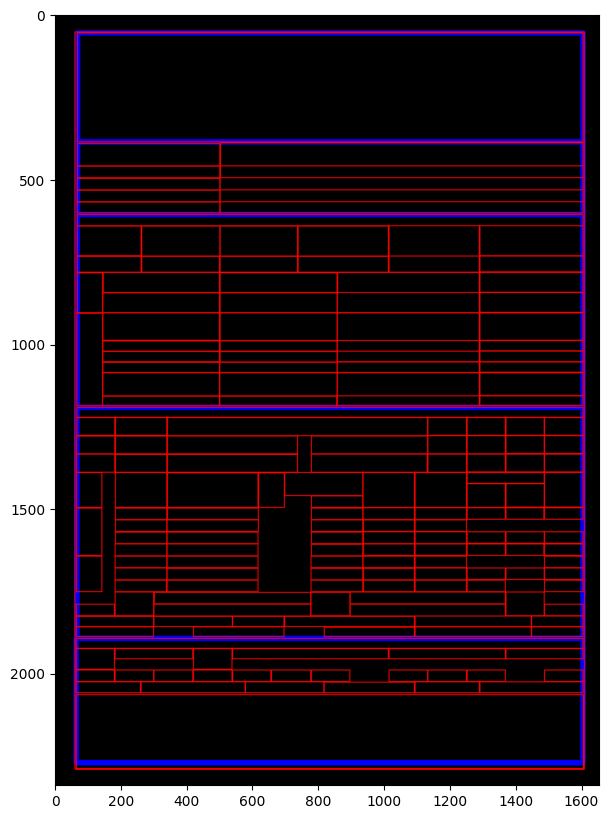

In [21]:
# Tạo ảnh mới để vẽ và tô kín các contour (có thể là ảnh đen cùng kích thước với ảnh gốc)
image_contours_filled = np.zeros_like(image)  # Ảnh đen cùng kích thước với ảnh gốc

for i in cut:
    cv2.rectangle(image_contours_filled,(i[0],i[1]),(i[2],i[3]),(255,0,0),15)


# Duyệt qua từng contour tìm được
for cnt in contours:
    # Kiểm tra diện tích contour để loại bỏ những contour quá nhỏ
    if cv2.contourArea(cnt) > S * 0.001:
        # Tô kín phần bên trong của contour (màu xanh lá cây, tô kín với -1)
        # cv2.drawContours(image_contours_filled, [cnt], -1, (0, 255, 0), 2)
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(image_contours_filled,(x,y),(x+w,y+h),(0,0,255),2)

        

# Hiển thị ảnh với các contour đã được tô kín
plt.figure(figsize=(25, 10))
plt.imshow(image_contours_filled[:,:,::-1])  # Đảo kênh BGR sang RGB để hiển thị đúng màu
plt.show()

In [22]:
image = cv2.imread('70.jpg')

for i in range(len(cut)):
    # Tọa độ x, y, w, h từ các giá trị của i
    x, y, x2, y2 = cut[i]

    # Cắt phần ảnh tương ứng với hình chữ nhật
    cropped_image = image[y:y2, x:x2,:]
    
    
    # Hoặc lưu phần cắt vào file (ví dụ lưu dưới dạng .jpg)
    cv2.imwrite(f'cut_image_{i}.jpg', cropped_image)